<a href="https://colab.research.google.com/github/MakhtoutMohamed/AIAgentModel/blob/main/Assignment1_CV_Makhtout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision | TP n°1

- Nom : Mohamed Makhtout
- Cours : Computer Vision
- Sujet : Assignment 1 | Manipulation d'images (OpenCV)

Ce notebook regroupe les exercices suivants :
- Niveaux de gris
- Espaces de couleurs
- Dessin sur des images
- Transformations (translations, rotations)
- Redimensionnement et recadrage
- Outils de traitement (histogrammes, seuillage)
- Rehaussement d'images
- Convolutions, blurring & sharpening
- Réponse à l'Assignment 3 du nb 8

In [76]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive

%matplotlib inline

drive.mount('/content/drive')

zip_path = "/content/drive/MyDrive/CV/assignment1_images.zip"

!unzip -q -n "$zip_path" -d "./images"

images_path = "./images/"

def show_bgr(img_bgr, title=None):
    """Affiche une image BGR (OpenCV) en RGB avec matplotlib."""
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis("off")
    if title:
        plt.title(title)
    plt.show()

def show_gray(img_gray, title=None):
    """Affiche une image en niveaux de gris."""
    plt.imshow(img_gray, cmap="gray")
    plt.axis("off")
    if title:
        plt.title(title)
    plt.show()

def load_color(filename):
    """Lit une image couleur en BGR depuis le dossier images."""
    img = cv2.imread(images_path + filename)
    if img is None:
        raise FileNotFoundError(f"Image introuvable : {images_path + filename}")
    return img


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
import os

print("Répertoire courant :")
print(os.getcwd())
print("\nContenu du dossier ./images :")
!ls -R ./images


Répertoire courant :
/content

Contenu du dossier ./images :
./images:
assignment1_images

./images/assignment1_images:
camera_cctv.jpg  night_photo.jpg     slightly_blurred.jpg
clean_image.jpg  product.jpg	     tilted_scene.jpg
football.jpg	 satellite_gray.png  traffic_light.jpg


## 1. Niveaux de gris

- Convertir une image de **caméra de surveillance** en niveaux de gris.
- Comparer **original vs grayscale**.
- Discuter : *le gris est-il meilleur pour la détection de mouvement ?*
- Trouver le **pixel le plus lumineux** pour repérer la source de lumière.

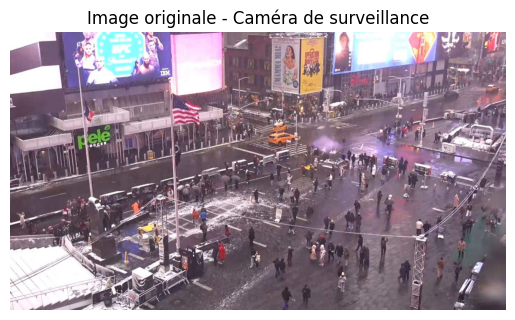

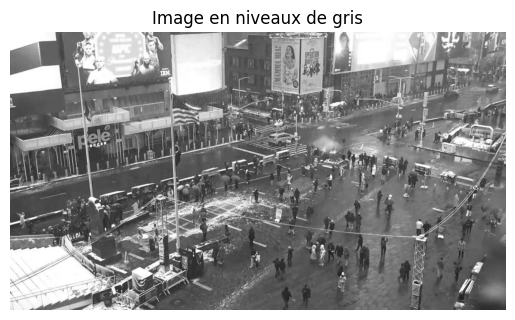

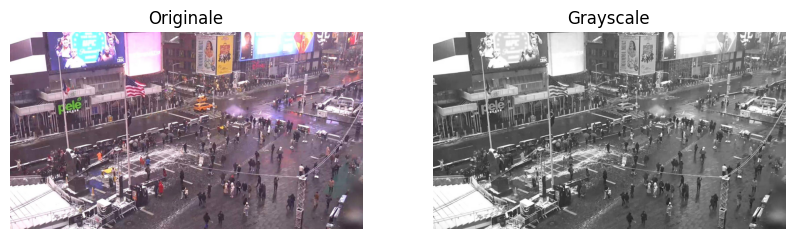

Valeur max (luminosité) : 255.0
Position du pixel le plus lumineux : (0, 0)


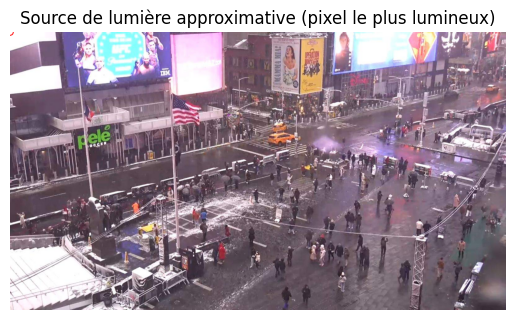

In [78]:
camera = load_color("assignment1_images/camera_cctv.jpg")
show_bgr(camera, "Image originale - Caméra de surveillance")

camera_gray = cv2.cvtColor(camera, cv2.COLOR_BGR2GRAY)
show_gray(camera_gray, "Image en niveaux de gris")

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(camera, cv2.COLOR_BGR2RGB))
plt.title("Originale")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(camera_gray, cmap="gray")
plt.title("Grayscale")
plt.axis("off")

plt.show()

minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(camera_gray)
print("Valeur max (luminosité) :", maxVal)
print("Position du pixel le plus lumineux :", maxLoc)

camera_marked = camera.copy()
cv2.circle(camera_marked, maxLoc, 10, (0,0,255), 2)
show_bgr(camera_marked, "Source de lumière approximative (pixel le plus lumineux)")


### Discussion

- Le passage en niveaux de gris supprime l'information de couleur et ne garde que l'intensité.
- Pour la **détection de mouvement**, c'est souvent suffisant et plus efficace :
  - moins d'informations à traiter,
  - pas de variations parasites dues seulement à la couleur.
- Le pixel le plus lumineux repéré correspond approximativement à la **source de lumière principale** (lampe, projecteur, etc.).

## 2. Espaces de couleurs HSV

Dans une image de **feu tricolore** :
- Convertir l'image en **HSV**.
- Créer trois **masques** (rouge, orange, vert).
- Détecter automatiquement **quelle lumière est allumée**.

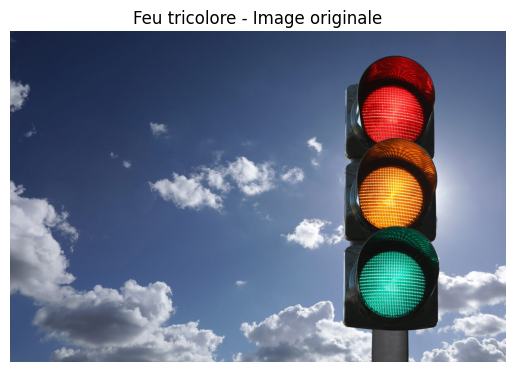

Nombre de pixels par couleur : {'Rouge': 27165, 'Orange': 16234, 'Vert': 12242}
>>> Lumière détectée : Rouge


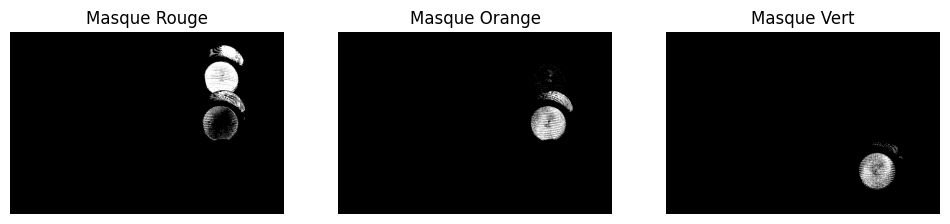

In [79]:
traffic = load_color("assignment1_images/traffic_light.jpg")
show_bgr(traffic, "Feu tricolore - Image originale")

traffic_hsv = cv2.cvtColor(traffic, cv2.COLOR_BGR2HSV)

# Rouge
lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([160, 100, 100])
upper_red2 = np.array([179, 255, 255])

mask_red = cv2.inRange(traffic_hsv, lower_red1, upper_red1) | \
           cv2.inRange(traffic_hsv, lower_red2, upper_red2)

# Orange
lower_orange = np.array([10, 100, 100])
upper_orange = np.array([25, 255, 255])
mask_orange = cv2.inRange(traffic_hsv, lower_orange, upper_orange)

# Vert
lower_green = np.array([40, 100, 100])
upper_green = np.array([85, 255, 255])
mask_green = cv2.inRange(traffic_hsv, lower_green, upper_green)

# compter les pixels dans chaque masque
counts = {
    "Rouge":  cv2.countNonZero(mask_red),
    "Orange": cv2.countNonZero(mask_orange),
    "Vert":   cv2.countNonZero(mask_green)
}
print("Nombre de pixels par couleur :", counts)

light_on = max(counts, key=counts.get)
print(">>> Lumière détectée :", light_on)

# Visualiser les masques
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(mask_red, cmap="gray")
plt.title("Masque Rouge")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(mask_orange, cmap="gray")
plt.title("Masque Orange")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(mask_green, cmap="gray")
plt.title("Masque Vert")
plt.axis("off")

plt.show()


## 3. Dessin sur des images

Dans une image d'un **match de football** :
- Dessiner un **rectangle** autour du ballon.
- Dessiner une **flèche** indiquant la direction du tir.
- Ajouter un texte : **"Vitesse de tir : 73 km/h"**.

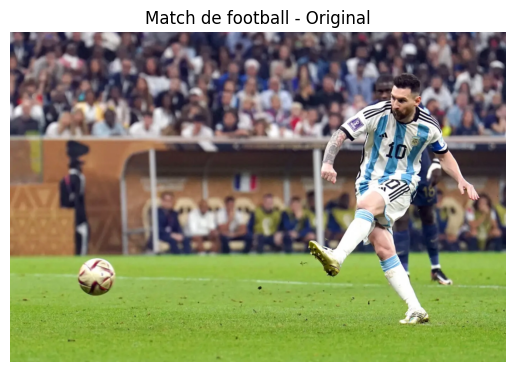

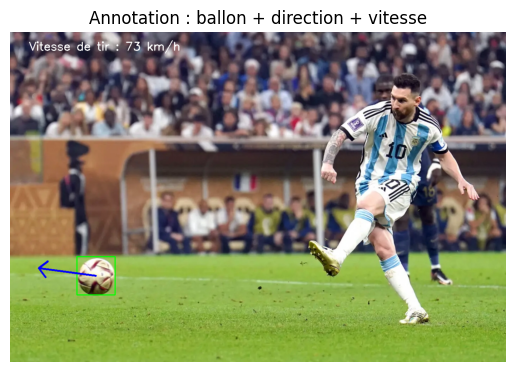

In [80]:
football = load_color("assignment1_images/football.jpg")
show_bgr(football, "Match de football - Original")

annotated = football.copy()

x, y, w, h = 175, 590, 100, 100
cv2.rectangle(annotated, (x, y), (x + w, y + h), (0, 255, 0), 2)

start_point = (x + w//2, y + h//2)
end_point   = (x + w//2 - 150, y + h//2 - 20)
cv2.arrowedLine(annotated, start_point, end_point, (255, 0, 0), 3, tipLength=0.2)

cv2.putText(annotated,
            "Vitesse de tir : 73 km/h",
            (50, 50),
            cv2.FONT_HERSHEY_SIMPLEX,
            1.0,
            (255, 255, 255),
            2)

show_bgr(annotated, "Annotation : ballon + direction + vitesse")


## 4. Transformations (Translation + Rotation)

Sur une photo prise de travers :
- Estimer l’**angle d’inclinaison**.
- Appliquer une **rotation inverse** pour redresser la scène.
- Comparer **avant / après**.

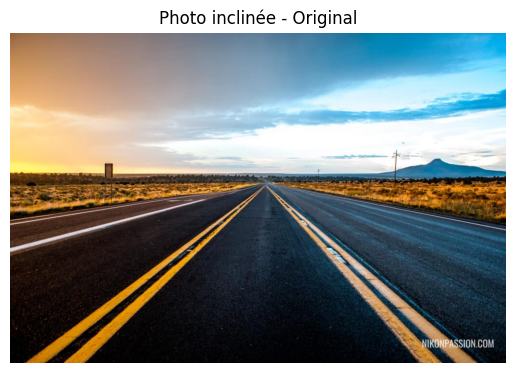

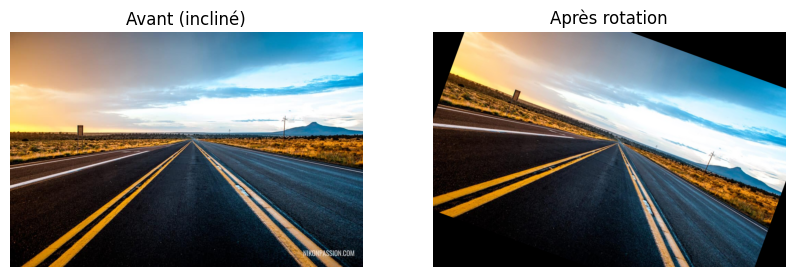

In [81]:
tilted = load_color("assignment1_images/tilted_scene.jpg")
show_bgr(tilted, "Photo inclinée - Original")

(h, w) = tilted.shape[:2]
center = (w // 2, h // 2)

angle_deg = -20

M = cv2.getRotationMatrix2D(center, angle_deg, 1.0)
rotated = cv2.warpAffine(tilted, M, (w, h), flags=cv2.INTER_LINEAR)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(tilted, cv2.COLOR_BGR2RGB))
plt.title("Avant (incliné)")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
plt.title("Après rotation")
plt.axis("off")

plt.show()


## 5. Redimensionnement, Interpolation, Recadrage

Préparer une image d'un **produit e-commerce** :
- Redimensionner en **512×512**.
- Recadrer pour **centrer l'objet** dans un carré parfait.
- Créer une **miniature 128×128** avec différents types d'interpolation.

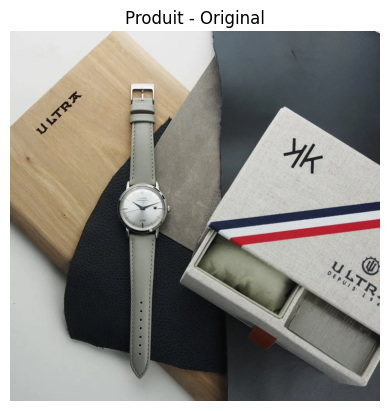

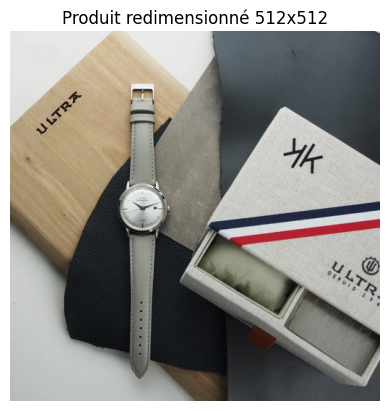

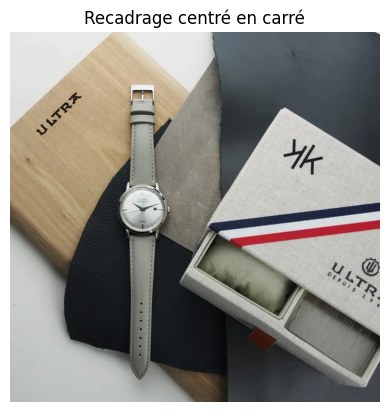

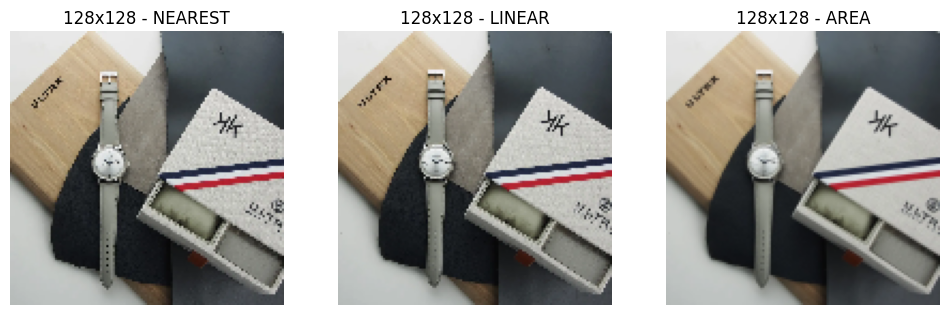

In [82]:
product = load_color("assignment1_images/product.jpg")
show_bgr(product, "Produit - Original")

# 512x512
product_512 = cv2.resize(product, (512, 512), interpolation=cv2.INTER_LINEAR)
show_bgr(product_512, "Produit redimensionné 512x512")

h, w = product.shape[:2]
min_side = min(h, w)
start_x = w//2 - min_side//2
start_y = h//2 - min_side//2
crop_center = product[start_y:start_y+min_side, start_x:start_x+min_side]
show_bgr(crop_center, "Recadrage centré en carré")

thumb_nearest = cv2.resize(crop_center, (128, 128), interpolation=cv2.INTER_NEAREST)
thumb_linear  = cv2.resize(crop_center, (128, 128), interpolation=cv2.INTER_LINEAR)
thumb_area    = cv2.resize(crop_center, (128, 128), interpolation=cv2.INTER_AREA)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(thumb_nearest, cv2.COLOR_BGR2RGB))
plt.title("128x128 - NEAREST")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(thumb_linear, cv2.COLOR_BGR2RGB))
plt.title("128x128 - LINEAR")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(thumb_area, cv2.COLOR_BGR2RGB))
plt.title("128x128 - AREA")
plt.axis("off")

plt.show()


## 6. Outils de traitement (Histogrammes, Seuillage)

Sur une image satellite en niveaux de gris (zones d'eau sombres, nuages clairs) :
- Analyser l'**histogramme initial**.
- Appliquer une **égalisation d'histogramme**.
- Appliquer un **seuillage automatique (Otsu)** sur l’image égalisée pour séparer les **nuages (valeurs élevées)** de la **terre/eau (valeurs basses)**.

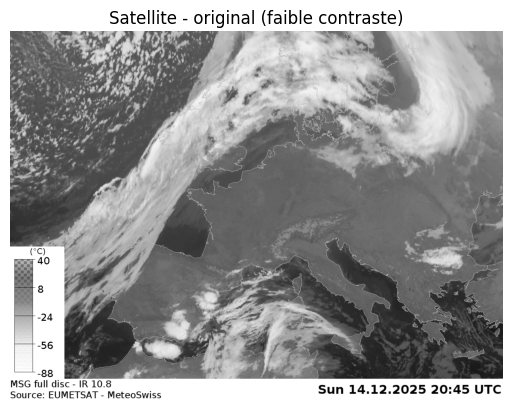

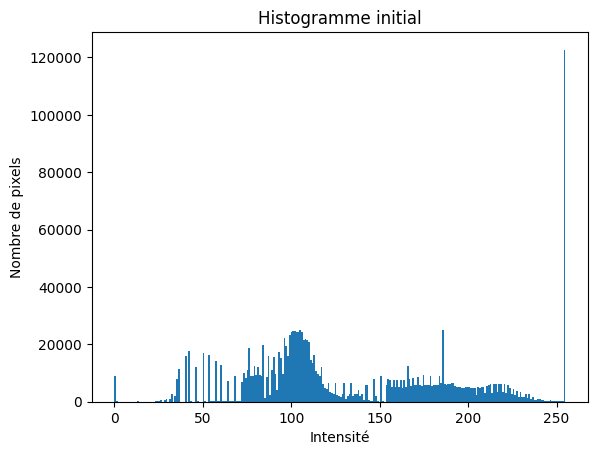

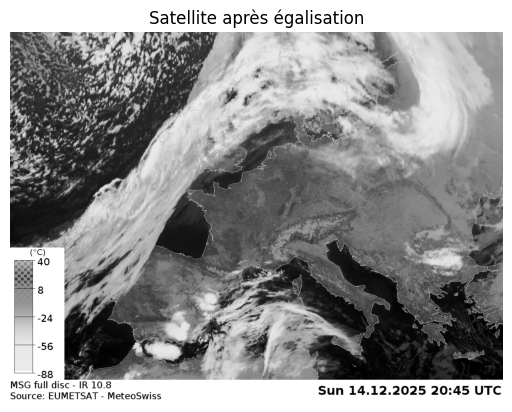

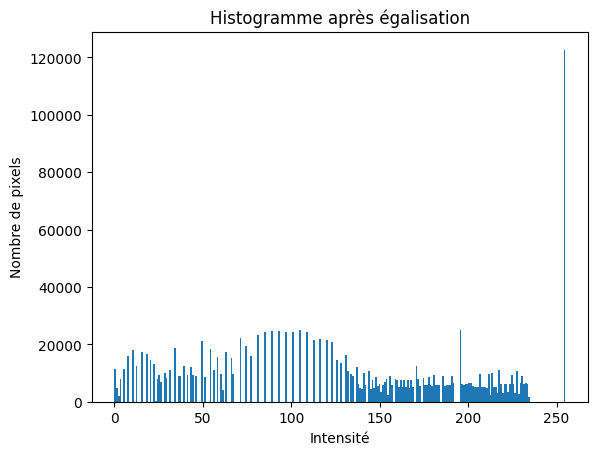

Seuil Otsu choisi : 128.0


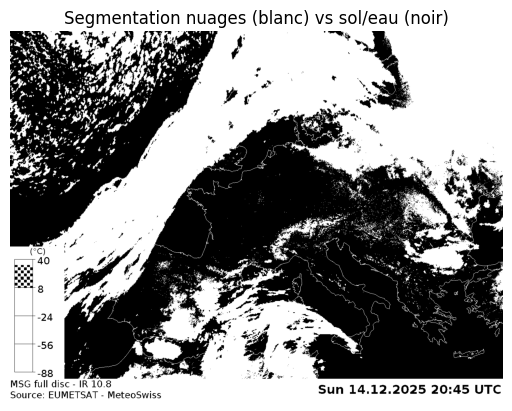

In [83]:
sat = cv2.imread(images_path + "assignment1_images/satellite_gray.png", cv2.IMREAD_GRAYSCALE)
if sat is None:
    raise FileNotFoundError("assignment1_images/satellite_gray.png introuvable")

show_gray(sat, "Satellite - original (faible contraste)")

plt.figure()
plt.hist(sat.ravel(), bins=256, range=(0,255))
plt.title("Histogramme initial")
plt.xlabel("Intensité")
plt.ylabel("Nombre de pixels")
plt.show()

sat_eq = cv2.equalizeHist(sat)
show_gray(sat_eq, "Satellite après égalisation")

plt.figure()
plt.hist(sat_eq.ravel(), bins=256, range=(0,255))
plt.title("Histogramme après égalisation")
plt.xlabel("Intensité")
plt.ylabel("Nombre de pixels")
plt.show()

thresh_val, sat_otsu = cv2.threshold(
    sat_eq, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU
)
print("Seuil Otsu choisi :", thresh_val)

show_gray(sat_otsu, "Segmentation nuages (blanc) vs sol/eau (noir)")


## 7. Rehaussement l'images

Sur une **photo prise la nuit** :
- Appliquer une **correction gamma douce (~1.6)** pour éclaircir les zones sombres.
- Visualiser l'**histogramme après correction**.
- Augmenter légèrement le **contraste**.
- Comparer avant / après.

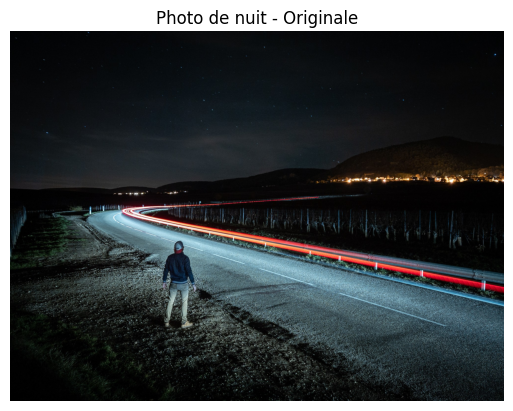

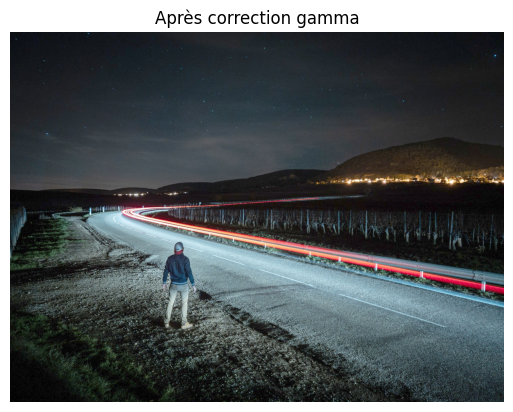

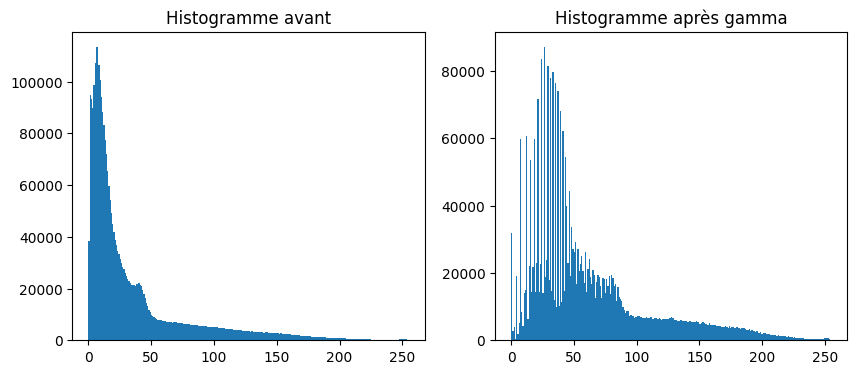

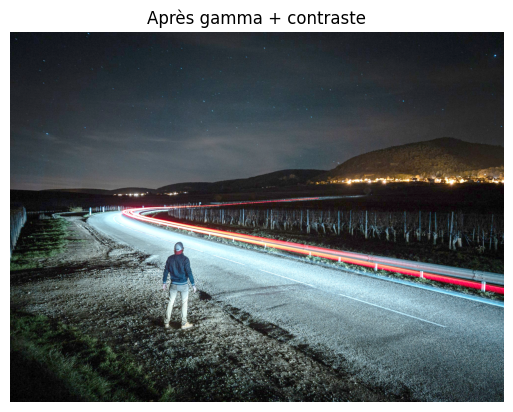

In [84]:
night = load_color("assignment1_images/night_photo.jpg")
show_bgr(night, "Photo de nuit - Originale")

gamma = 1.6
inv_gamma = 1.0 / gamma
# LUT pour accélérer
table = np.array([
    ((i / 255.0) ** inv_gamma) * 255 for i in range(256)
]).astype("uint8")

night_gamma = cv2.LUT(night, table)
show_bgr(night_gamma, "Après correction gamma")

# Histogramme
night_gray = cv2.cvtColor(night, cv2.COLOR_BGR2GRAY)
night_gamma_gray = cv2.cvtColor(night_gamma, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(night_gray.ravel(), bins=256, range=(0,255))
plt.title("Histogramme avant")
plt.subplot(1,2,2)
plt.hist(night_gamma_gray.ravel(), bins=256, range=(0,255))
plt.title("Histogramme après gamma")
plt.show()

# Augmenter légèrement le contraste (alpha > 1)
alpha = 1.2
beta = 0
night_contrast = cv2.convertScaleAbs(night_gamma, alpha=alpha, beta=beta)
show_bgr(night_contrast, "Après gamma + contraste")


## 8. Convolutions, Blurring & Sharpening

Sur une image légèrement floue :
- Appliquer un **flou gaussien** pour réduire le bruit : est-ce le filtre le mieux adapté ?
- Appliquer un **filtre de netteté (sharpening)** pour restaurer les détails.
- Faire une **petite recherche** sur les différents **types de bruit** (gaussien, sel & poivre, etc.) et les **filtres adaptés**.
- Donner un **exemple** en créant artificiellement un bruit sur une image nette et en le réduisant.

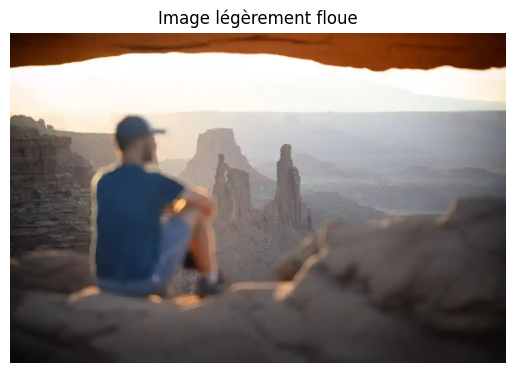

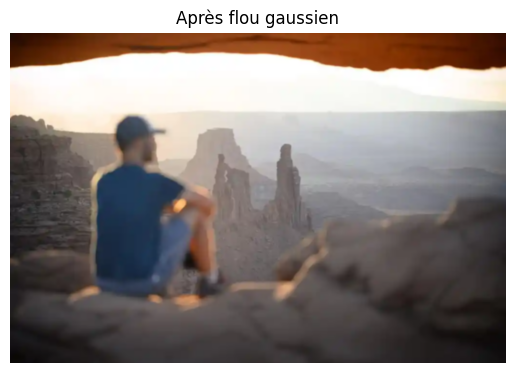

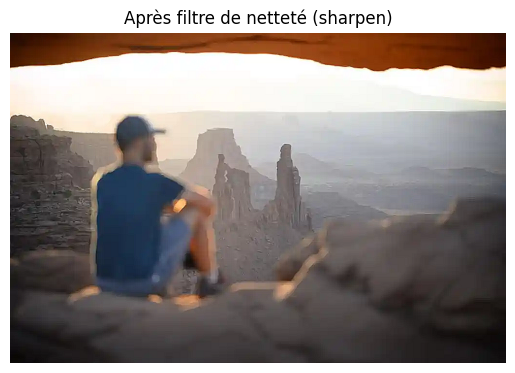

In [85]:
blurred = load_color("assignment1_images/slightly_blurred.jpg")
show_bgr(blurred, "Image légèrement floue")

gauss_blur = cv2.GaussianBlur(blurred, (5,5), 1.0)
show_bgr(gauss_blur, "Après flou gaussien")

kernel_sharpen = np.array([[0, -1,  0],
                           [-1, 5, -1],
                           [0, -1,  0]])
sharpened = cv2.filter2D(blurred, -1, kernel_sharpen)
show_bgr(sharpened, "Après filtre de netteté (sharpen)")


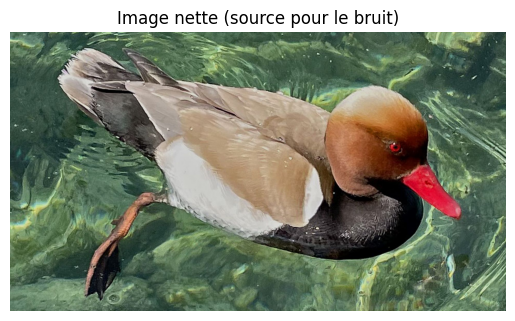

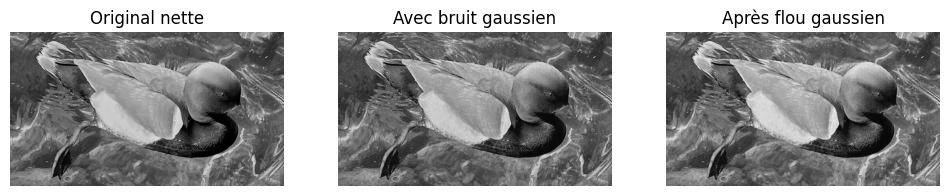

In [86]:
clean = load_color("assignment1_images/clean_image.jpg")
show_bgr(clean, "Image nette (source pour le bruit)")

clean_gray = cv2.cvtColor(clean, cv2.COLOR_BGR2GRAY)

mean = 0
sigma = 25
gauss_noise = np.random.normal(mean, sigma, clean_gray.shape).astype(np.float32)
noisy_gauss = clean_gray.astype(np.float32) + gauss_noise
noisy_gauss = np.clip(noisy_gauss, 0, 255).astype("uint8")

denoised_gauss = cv2.GaussianBlur(noisy_gauss, (5,5), 1.0)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(clean_gray, cmap="gray")
plt.title("Original nette")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(noisy_gauss, cmap="gray")
plt.title("Avec bruit gaussien")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(denoised_gauss, cmap="gray")
plt.title("Après flou gaussien")
plt.axis("off")

plt.show()


## 9. Assignment 3 | Spécification de l'histogramme

Objectif :
- Appliquer la **spécification d'histogramme** `match_histograms` pour transformer une image source de façon à ce que son histogramme corresponde à celui d'une image de **référence**.
- Afficher les images **Source**, **Référence** et **Matched**, ainsi que leurs **histogrammes**, et commenter le résultat.

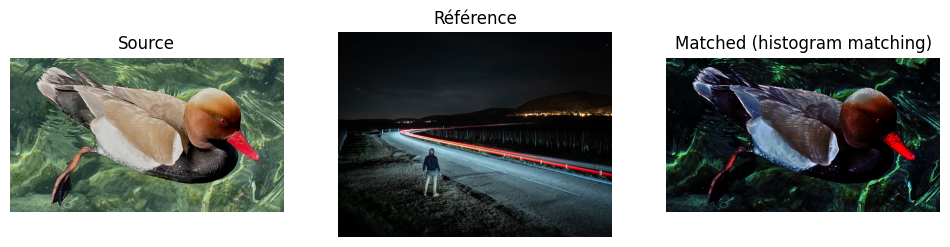

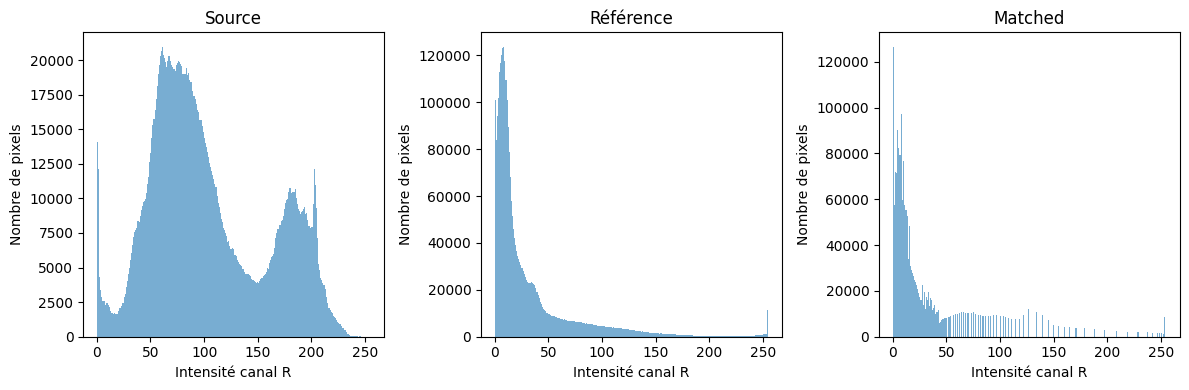

In [87]:
from skimage.exposure import match_histograms
from skimage import io

source_bgr = load_color("assignment1_images/clean_image.jpg")
reference_bgr = load_color("assignment1_images/night_photo.jpg")

source_rgb = cv2.cvtColor(source_bgr, cv2.COLOR_BGR2RGB)
reference_rgb = cv2.cvtColor(reference_bgr, cv2.COLOR_BGR2RGB)

matched_rgb = match_histograms(source_rgb, reference_rgb, channel_axis=-1)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(source_rgb)
plt.title("Source")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(reference_rgb)
plt.title("Référence")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(matched_rgb)
plt.title("Matched (histogram matching)")
plt.axis("off")

plt.show()

def plot_hist_channel(img, title):
    r = img[...,0].ravel()
    plt.hist(r, bins=256, range=(0,255), alpha=0.6)
    plt.title(title)
    plt.xlabel("Intensité canal R")
    plt.ylabel("Nombre de pixels")

plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plot_hist_channel(source_rgb, "Source")
plt.subplot(1,3,2); plot_hist_channel(reference_rgb, "Référence")
plt.subplot(1,3,3); plot_hist_channel(matched_rgb, "Matched")
plt.tight_layout()
plt.show()
